In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/X.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy


Here are the libraries we are using

In [169]:
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

Loading Data

In [170]:
x_data=np.load("../input/sign-language-digits-dataset/X.npy")
y_data=np.load("../input/sign-language-digits-dataset/Y.npy")

In [171]:
x_data.shape,y_data.shape

((2062, 64, 64), (2062, 10))

In [172]:
arr=list(range(2062))
np.random.shuffle(arr)

X=[]
Y=[]
for i in arr:
    Y.append(list(y_data[i]).index(1))
    X.append(list(x_data[i]))
    
Y=np.array(Y).reshape(2062,1)
X=np.array(X)

[9]


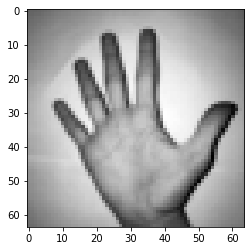

In [189]:
plt.imshow(X[90],cmap="gray")
print(Y[90])

Preparing test and training sets

In [174]:
x_train,x_test=X[0:1400],X[1400:2062]
y_train,y_test=Y[0:1400],Y[1400:2062]

preparing sequential model of CNN

In [175]:
digit_recognition=tf.keras.models.Sequential()

digit_recognition.add(tf.keras.layers.Conv2D(filters= 32,kernel_size=(6,6),padding="Same",activation="relu",input_shape=(64,64,1)))
digit_recognition.add(tf.keras.layers.Conv2D(filters= 32, kernel_size=(3,3),padding="Same",activation="relu"))
digit_recognition.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
digit_recognition.add(tf.keras.layers.Conv2D(filters= 16, kernel_size=(3,3),padding="Same",activation="relu"))
digit_recognition.add(tf.keras.layers.Dropout(0.25))
digit_recognition.add(tf.keras.layers.Conv2D(filters= 8, kernel_size=(3,3),padding="Same",activation="relu"))
digit_recognition.add(tf.keras.layers.Flatten())
digit_recognition.add(tf.keras.layers.Dense(256,activation="relu"))
digit_recognition.add(tf.keras.layers.Dropout(0.5))
digit_recognition.add(tf.keras.layers.Dense(128,activation="relu"))
digit_recognition.add(tf.keras.layers.Dense(10, activation = "softmax"))



print(digit_recognition.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 64, 64, 32)        1184      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 16)        4624      
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 32, 32, 8)         1160      
_________________________________________________________________
flatten_10 (Flatten)         (None, 8192)            

In [176]:
digit_recognition.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [180]:
digit_recognition.fit(x_train.reshape(-1,64,64,1), y_train, batch_size=280, epochs=14)

Epoch 1/14
5/5 [==============================] - 8s 2s/step - loss: 0.6958 - sparse_categorical_accuracy: 0.7657
Epoch 2/14
5/5 [==============================] - 8s 2s/step - loss: 0.6622 - sparse_categorical_accuracy: 0.7986
Epoch 3/14
5/5 [==============================] - 8s 2s/step - loss: 0.5857 - sparse_categorical_accuracy: 0.8136
Epoch 4/14
5/5 [==============================] - 8s 2s/step - loss: 0.5565 - sparse_categorical_accuracy: 0.8214
Epoch 5/14
5/5 [==============================] - 8s 2s/step - loss: 0.5108 - sparse_categorical_accuracy: 0.8314
Epoch 6/14
5/5 [==============================] - 8s 2s/step - loss: 0.4800 - sparse_categorical_accuracy: 0.8379
Epoch 7/14
5/5 [==============================] - 8s 2s/step - loss: 0.4442 - sparse_categorical_accuracy: 0.8500
Epoch 8/14
5/5 [==============================] - 8s 2s/step - loss: 0.4235 - sparse_categorical_accuracy: 0.8571
Epoch 9/14
5/5 [==============================] - 8s 2s/step - loss: 0.3974 - sparse_cat

In [181]:
digit_recognition.evaluate(x_test.reshape(-1,64,64,1), y_test)

21/21 [==============================] - 1s 50ms/step - loss: 0.5219 - sparse_categorical_accuracy: 0.8550


[0.521933913230896, 0.8549848794937134]

9 [9]


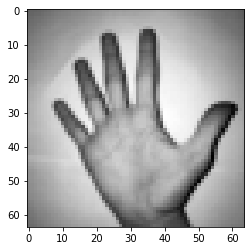

In [190]:
i=90
pred=digit_recognition.predict(X[i].reshape(-1,64,64,1))
print(np.argmax(pred),Y[i])
plt.imshow(X[i],cmap="gray")